In [1]:
import MDAnalysis
from MDAnalysis.analysis.dihedrals import Ramachandran
from MDAnalysis.analysis.align import AlignTraj
from MDAnalysis.analysis.distances import *
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm  
import mdtraj as md

/net/galaxy/home/koes/rishal/.conda/envs/nce/lib/python3.10/site-packages/Bio/Application/__init__.py:39: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(
/net/galaxy/home/koes/rishal/.conda/envs/nce/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
data_path ='../data/AAAA'


In [3]:
u=MDAnalysis.Universe(data_path + '/AAAA.prmtop', [data_path + '/aaaa_19.nc'])
dihedrals = Ramachandran(u.select_atoms('all')).run()
angs = np.array(dihedrals.angles).reshape((len(dihedrals.angles),4))
df = pd.DataFrame(angs,columns=['$\phi_1$','$\psi_1$','$\phi_2$','$\psi_2$'])
phi1 = df['$\phi_1$']
psi1 = df['$\psi_1$']
phi2 = df['$\phi_2$']
psi2 = df['$\psi_2$']

#free energy surface
phi1=phi1/180*np.pi
psi1=psi1/180*np.pi
phi2=phi2/180*np.pi
psi2=psi2/180*np.pi

/net/galaxy/home/koes/rishal/.conda/envs/nce/lib/python3.10/site-packages/MDAnalysis/analysis/dihedrals.py:444: UserWarning: Cannot determine phi and psi angles for the first or last residues
  warnings.warn(
/net/galaxy/home/koes/rishal/.conda/envs/nce/lib/python3.10/site-packages/MDAnalysis/analysis/dihedrals.py:574: DeprecationWarning: The `angle` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.angles` instead
  warnings.warn(wmsg, DeprecationWarning)


In [23]:
def plot_ramachandran(angs,num=1):
    df = pd.DataFrame(angs,columns=['$\phi_1$','$\psi_1$','$\phi_2$','$\psi_2$'])
    

    phi1 = df['$\phi_1$']
    psi1 = df['$\psi_1$']
    phi2 = df['$\phi_2$']
    psi2 = df['$\psi_2$']
    
    #free energy surface
    phi1=phi1/180*np.pi
    psi1=psi1/180*np.pi
    phi2=phi2/180*np.pi
    psi2=psi2/180*np.pi
    plot_range = [-np.pi, np.pi]
    
    plt.figure(figsize=(9, 9))
    if num==1:
        h, x_bins, y_bins, im = plt.hist2d(phi1, psi1, 100, norm=LogNorm(), range=[plot_range,plot_range],rasterized=True)
    else:
        h, x_bins, y_bins, im = plt.hist2d(phi2, psi2, 100, norm=LogNorm(), range=[plot_range,plot_range],rasterized=True)

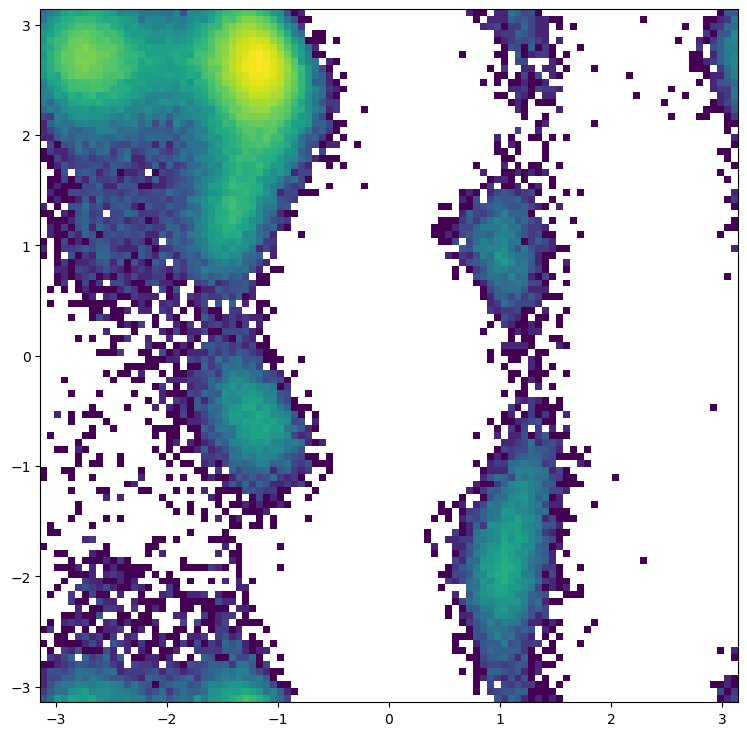

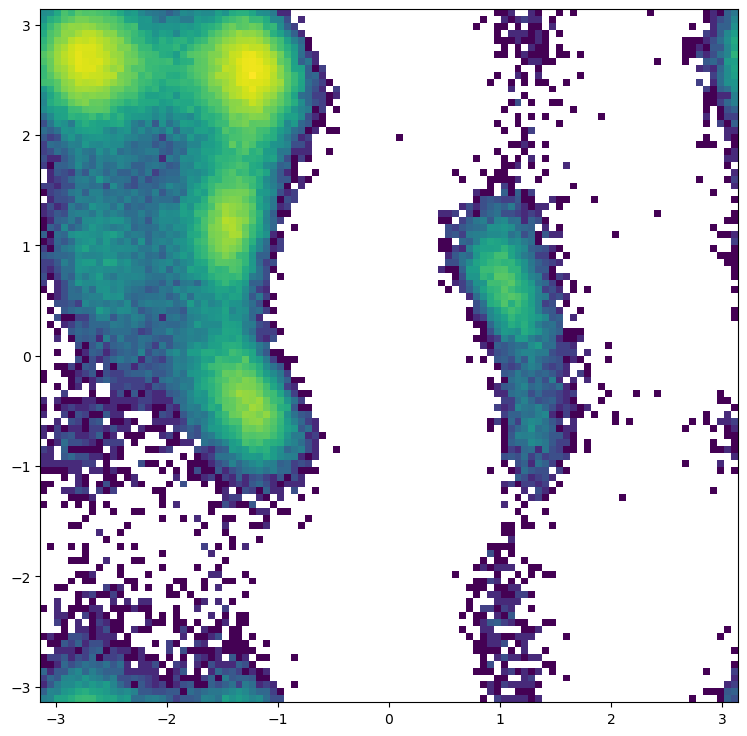

In [24]:
plot_ramachandran(angs,num=1)
plot_ramachandran(angs,num=2)

In [6]:
#ph1 free energy surface
def plot_fes(
    samples: np.ndarray,
    bw_method:  None,
    weights: None,
    get_DeltaF: bool = True,
    kBT: float = 1.0,
    label: str = 'FES'
):
    from scipy.stats import gaussian_kde
    bw_method = 0.18
    grid = np.linspace(samples.min(), samples.max(), 100)
    if weights is not None:
        weights = weights[:,0]
        samples=samples[weights!=0]
        weights=weights[weights!=0]
    fes = -kBT * gaussian_kde(samples, bw_method, weights).logpdf(grid)
    fes -= fes.min()
    plt.plot(grid, fes, label=label)
    return grid, fes



Text(0, 0.5, '$\\Delta F$ ')

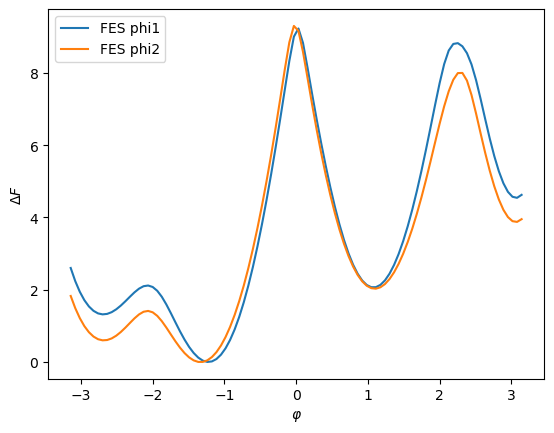

In [7]:
plot_fes(phi1, bw_method=None, weights=None, get_DeltaF=True, kBT=1.0, label='FES phi1')
plot_fes(phi2, bw_method=None, weights=None, get_DeltaF=True, kBT=1.0, label='FES phi2')
plt.legend()
plt.xlabel(r'$\varphi$')
plt.ylabel(r'$\Delta F$ ')

In [8]:
u=MDAnalysis.Universe(data_path + '/AAAA.prmtop', [data_path + '/aaaa_16.nc'])
dihedrals_2 = Ramachandran(u.select_atoms('all')).run()
angs_2 = np.array(dihedrals_2.angles).reshape((len(dihedrals_2.angles),4))
df_2 = pd.DataFrame(angs_2,columns=['$\phi_1$','$\psi_1$','$\phi_2$','$\psi_2$'])
phi_2_1 = df_2['$\phi_1$']
psi_2_1 = df_2['$\psi_1$']
phi_2_2 = df_2['$\phi_2$']
psi_2_2 = df_2['$\psi_2$']

#free energy surface
phi_2_1=phi_2_1/180*np.pi
psi_2_1=psi_2_1/180*np.pi
phi_2_2=phi_2_2/180*np.pi
psi_2_2=psi_2_2/180*np.pi

Text(0, 0.5, '$\\Delta F$ ')

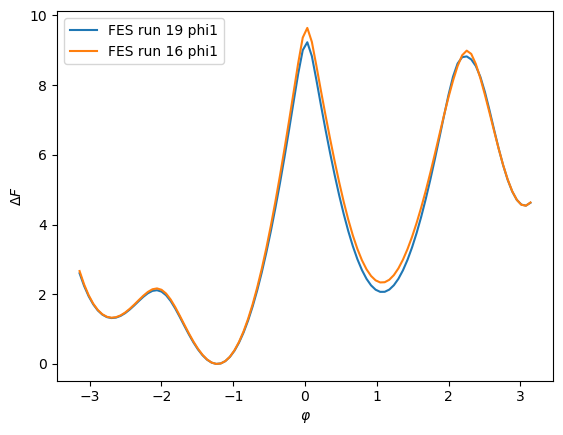

In [9]:
plot_fes(phi1, bw_method=None, weights=None, get_DeltaF=True, kBT=1.0, label='FES run 19 phi1')
plot_fes(phi_2_1, bw_method=None, weights=None, get_DeltaF=True, kBT=1.0, label='FES run 16 phi1')
plt.legend()
plt.xlabel(r'$\varphi$')
plt.ylabel(r'$\Delta F$ ')

Text(0, 0.5, '$\\Delta F$ ')

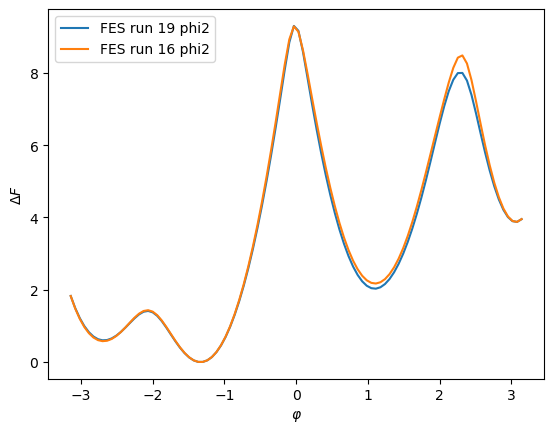

In [10]:
plot_fes(phi2, bw_method=None, weights=None, get_DeltaF=True, kBT=1.0, label='FES run 19 phi2')
plot_fes(phi_2_2, bw_method=None, weights=None, get_DeltaF=True, kBT=1.0, label='FES run 16 phi2')
plt.legend()
plt.xlabel(r'$\varphi$')
plt.ylabel(r'$\Delta F$ ')

Text(0, 0.5, '$\\Delta F$ ')

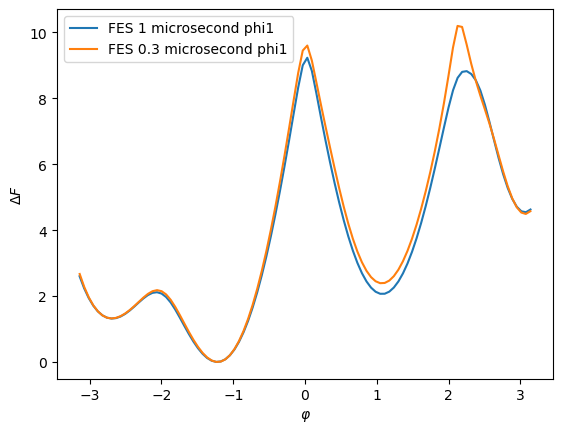

In [11]:
plot_fes(phi1, bw_method=None, weights=None, get_DeltaF=True, kBT=1.0, label='FES 1 microsecond phi1')
plot_fes(phi1[:30000], bw_method=None, weights=None, get_DeltaF=True, kBT=1.0, label='FES 0.3 microsecond phi1')
plt.legend()
plt.xlabel(r'$\varphi$')
plt.ylabel(r'$\Delta F$ ')

Text(0, 0.5, '$\\Delta F$ ')

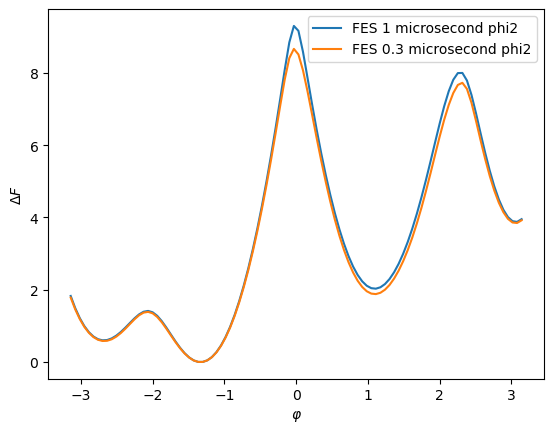

In [12]:
plot_fes(phi2, bw_method=None, weights=None, get_DeltaF=True, kBT=1.0, label='FES 1 microsecond phi2')
plot_fes(phi2[:30000], bw_method=None, weights=None, get_DeltaF=True, kBT=1.0, label='FES 0.3 microsecond phi2')
plt.legend()
plt.xlabel(r'$\varphi$')
plt.ylabel(r'$\Delta F$ ')

In [13]:
plot_ramachandran(angs[:30000])

In [14]:
plot_ramachandran(angs[:30000])

In [15]:
#get coordinates of entire trajectory
u=MDAnalysis.Universe(data_path + '/AAAA.prmtop', [data_path + '/aaaa_1.nc'])
coords =[]
for ts in u.trajectory:
    coords.append(u.select_atoms('all').positions)
coords = np.array(coords)
print(coords.shape)

(100000, 43, 3)


In [16]:
print("Mean of coordinates:", coords[10].mean(axis=0))

Mean of coordinates: [0.2650436  0.34970582 0.11656931]


In [17]:
topology = md.load_prmtop(data_path + '/AAAA.prmtop')
n_atoms = topology.n_atoms

In [18]:
n_atoms

43

In [19]:
atom_types = []
amino_idx = []
amino_types = []
for i, amino in enumerate(topology.residues):
    for atom_name in amino.atoms:
        print(atom_name.name)
        amino_idx.append(i)
        amino_types.append(amino.name)
        if atom_name.name[0] == "H" and atom_name.name[-1] in ("1", "2", "3"):
            atom_name.name = atom_name.name[:-1]
        if atom_name.name[:2] == "OE" or atom_name.name[:2] == "OD":
            atom_name.name = atom_name.name[:-1]
        atom_types.append(atom_name.name)
print(atom_types)
print(amino_idx)

N
H
H2
H3
CA
HA
CB
HB1
HB2
HB3
C
O
N
H
CA
HA
CB
HB1
HB2
HB3
C
O
N
H
CA
HA
CB
HB1
HB2
HB3
C
O
N
H
CA
HA
CB
HB1
HB2
HB3
C
O
OXT
['N', 'H', 'H', 'H', 'CA', 'HA', 'CB', 'HB', 'HB', 'HB', 'C', 'O', 'N', 'H', 'CA', 'HA', 'CB', 'HB', 'HB', 'HB', 'C', 'O', 'N', 'H', 'CA', 'HA', 'CB', 'HB', 'HB', 'HB', 'C', 'O', 'N', 'H', 'CA', 'HA', 'CB', 'HB', 'HB', 'HB', 'C', 'O', 'OXT']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [20]:
import torch
amino_idx_one_hot = torch.nn.functional.one_hot(
            torch.tensor(amino_idx), num_classes=4
        )
unique_atoms = sorted(set(atom_types))
atom_to_index = {atom: i for i, atom in enumerate(unique_atoms)}

# Step 2: Convert to indices
indices = torch.tensor([atom_to_index[atom] for atom in atom_types])

# Step 3: One-hot encode
atom_type_one_hot = torch.nn.functional.one_hot(indices, num_classes=len(unique_atoms))

print(atom_type_one_hot.shape, amino_idx_one_hot.shape)  
final_one_hot = torch.cat((amino_idx_one_hot, atom_type_one_hot), dim=1)
print(final_one_hot.shape)  # Should be (n_atoms, n_amino_acids + n_atom_types)

torch.Size([43, 9]) torch.Size([43, 4])
torch.Size([43, 13])
